In [19]:
!pip install causalgraphicalmodels
!sed -i 's/collections/collections.abc/g' /usr/local/lib/python3.10/dist-packages/causalgraphicalmodels/cgm.py
from causalgraphicalmodels import CausalGraphicalModel


## EXERCISE 1

Create the following causal network to verify that the red path is indeed a backdor path using the Causal Graphical Models library

<img src='https://drive.google.com/uc?id=18HUhYGI9Bd2eR87jW_1AdQyCZZBOtBfD'>

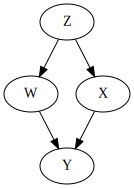

In [20]:
exe1 = CausalGraphicalModel(
    nodes = ["X", "Y", "W", "Z"],
    edges = [
        ("X","Y"),
        ("Z","X"),
        ("Z","W"),
        ("W","Y"),
    ]
)
exe1.draw()

In [21]:
exe1.get_all_backdoor_paths("X","Y")

[['X', 'Z', 'W', 'Y']]

## EXERCISE 2

Create the following causal network using the Causal Graphical Models library and find out all the possible sets that satisfy the backdoor criterion.

<img src='https://drive.google.com/uc?id=1rY42DmXV7TpRm7rt5N7m78w30VmyvotC'>



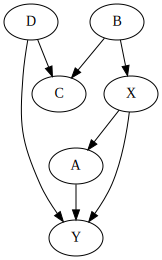

In [22]:
exe2 = CausalGraphicalModel(
    nodes = ["X", "Y", "A", "B", "C", "D"],
    edges = [
        ("X","Y"),
        ("X","A"),
        ("A","Y"),
        ("B","X"),
        ("B","C"),
        ("D","Y"),
        ("D","C"),
    ]
)
exe2.draw()

In [23]:
exe2.get_all_backdoor_adjustment_sets("X","Y")

frozenset({frozenset(),
           frozenset({'D'}),
           frozenset({'B'}),
           frozenset({'B', 'C'}),
           frozenset({'C', 'D'}),
           frozenset({'B', 'D'}),
           frozenset({'B', 'C', 'D'})})

## EXERCISE 3

Create the following causal network using the Causal Graphical Models library and find out all the valid sets for applying the front-door criterion.

<img src='https://drive.google.com/uc?id=1Z6YiKMDVKPLFM5luY_pT78ovSpWH-Ibd'>


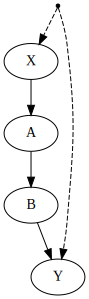

In [24]:
exe3 = CausalGraphicalModel(
    nodes = ["X", "Y", "A", "B"],
    edges = [
        ("X","A"),
        ("A","B"),
        ("B","Y"),
    ],
    latent_edges = [
        ("X","Y")
    ]
)
exe3.draw()

In [25]:
exe3.get_all_frontdoor_adjustment_sets("X","Y")

frozenset({frozenset({'A'}), frozenset({'B'}), frozenset({'A', 'B'})})

## EXERCISE 4

Create the following causal network using the Causal Graphical Models library and find out all the valid sets for applying the front-door criterion.

<img src='https://drive.google.com/uc?id=1lK3HZktVYCsJrDzZYEB0uQhL-DxWACcP'>

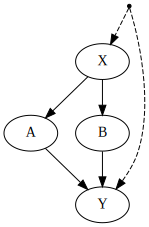

In [26]:
exe4 = CausalGraphicalModel(
    nodes = ["X", "Y", "A", "B"],
    edges = [
        ("X","A"),
        ("X","B"),
        ("B","Y"),
        ("A","Y"),
    ],
    latent_edges = [
        ("X","Y")
    ]
)
exe4.draw()

In [27]:
exe3.get_all_frontdoor_adjustment_sets("X","Y")

frozenset({frozenset({'A'}), frozenset({'B'}), frozenset({'A', 'B'})})

## EXERCISE 5

Consider again the smoking example, for which we have the following data from an hypothetical experiment with 400 smokers and 400 non-smokers:

<img src='https://drive.google.com/uc?id=1RvqtRMF4auVECmSniLFm5yOCq3ykmT-0'>

Write a Python program implementing the front-door adjustment and compute the causal effect of smoking on lung cancer is $P(y | do(x))$.

In [28]:
t,f =0,1
import numpy as np
#Prob. Distributions
P_X = np.array([400/800, 400/800])
P_Z_X = np.array([[380/400, 20/400],[20/400, 380/400]])
P_Y_ZX = np.array([[[57/380, 19/20],[2/20, 342/380]],[[323/380, 1/20],[18/20, 38/380]]])


p1 =  P_Y_ZX[t,t,f] * P_X[f] + P_Y_ZX[t,t,t] * P_X[t]

p2 = P_Y_ZX[t,f,f] * P_X[f] + P_Y_ZX[t,f,t] * P_X[t]

p_y_dox= P_Z_X[t,t] * p1 + P_Z_X[f,t] * p2 # P(y|do(x))

print(p_y_dox)

0.5475
